# Implementation of Support Vector classifier algorithm using python 

Prepared by : Swaminathan Ayyappan

Email : swamynathanayyappan@gmail.com

LinkedIn : linkedin.com/in/swaminathan-ayyappan-60b685175/

Problem description :

We are provided with an dataset that contains information of employees in an company , so for this given scenario we want to predict whether the respective employee will buy an SUV car or not based upon their salary.

The dataset contains :

i)User ID - User ID for the particular User.

ii)Gender - Gender of the particular member.

iii)Age - Age of that Particular User.

iv)EstimatedSalary - Salary that the particular person will receive.

v)Purchased - To know whether the user has purchased or not.

The dataset for this project is already posted on the github repository..

In [1]:
"""
i)Pandas - Used for handling dataset.

ii)numpy - stands for numerical python to handle arrays.

iii)matplotlib - To visualize our dataset and here 'pyplot' refers to making of statistical plots.

iv)seaborn - Advanced visualization library than matplotlib helps to visualize the dataset.

Note :

The %matplotlib inline helps to visualize the plots within the notebook itself.

"""
#Importing libraries like pandas,numpy,matplotlib and seaborn and their explanations are given above.
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns  
%matplotlib inline  

In [2]:
#Importing the Social network ads into ads variable with the help of pandas.
ads=pd.read_csv('F:/STUDY MATERIALS/[FreeCourseSite.com] Udemy - Machine Learning A-Z™ Hands-On Python & R In Data Science/Datasets/Machine Learning A-Z New/Part 3 - Classification/Section 16 - Support Vector Machine (SVM)/Social_Network_Ads.csv')

# Exploratory Data Analysis (EDA)

In [3]:
#Viewing the first five entries in the dataset.
ads.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
#provides entire information of the dataset.
ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
#given entire description of the numerical values of the dataset.
ads.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [6]:
#Viewing the last five entries in the dataset.
ads.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [7]:
#Displaying the column names / attributes in the dataset 
ads.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [8]:
#To know about the number of rows and columns in the dataset 
ads.shape

(400, 5)

In [9]:
#To verify any null values present in the dataset 
ads.isna().any()

User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

In [10]:
#To know about the each value's presence in the particular column (User ID) of the dataset.
ads['User ID'].value_counts()

15709183    1
15589715    1
15779581    1
15611191    1
15724858    1
           ..
15727467    1
15699619    1
15697574    1
15628972    1
15730688    1
Name: User ID, Length: 400, dtype: int64

In [11]:
#To know about the each value's presence in the particular column (Gender) of the dataset.
ads['Gender'].value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

In [12]:
#To know about the each value's presence in the particular column (Age) of the dataset.
ads['Age'].value_counts()

35    32
37    20
41    16
42    16
26    16
39    15
40    15
47    14
48    14
38    13
27    13
28    12
46    12
36    12
31    11
30    11
29    10
49    10
32     9
33     9
24     9
20     7
19     7
60     7
59     7
45     7
25     6
34     6
58     6
52     6
23     6
57     5
22     5
18     5
53     5
21     4
50     4
54     4
55     3
43     3
56     3
51     3
44     2
Name: Age, dtype: int64

In [13]:
#To know about the each value's presence in the particular column (Gender) of the dataset.
ads['EstimatedSalary'].value_counts()

72000     12
80000     11
79000     10
71000      9
75000      9
          ..
142000     1
100000     1
37000      1
114000     1
64000      1
Name: EstimatedSalary, Length: 117, dtype: int64

In [14]:
#To know about the each value's presence in the particular column (Purchased) of the dataset.
ads['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [15]:
#correlation between variables.
ads.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


# Data Visualization

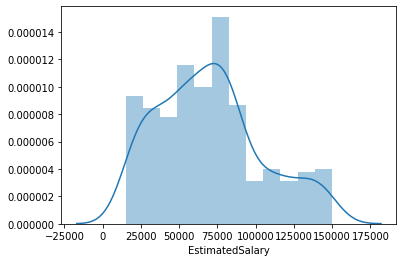

In [16]:
#To create a ditance plot of the EstimatedSalary column in the dataset
sns.distplot(ads['EstimatedSalary'])
plt.show()

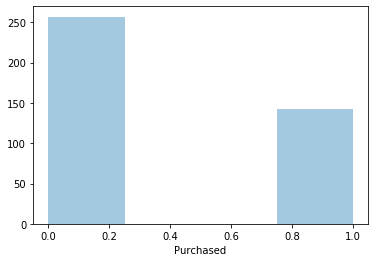

In [17]:
#To create a ditance plot of the Purchased column in the dataset
sns.distplot(ads['Purchased'],kde=False)
plt.show()

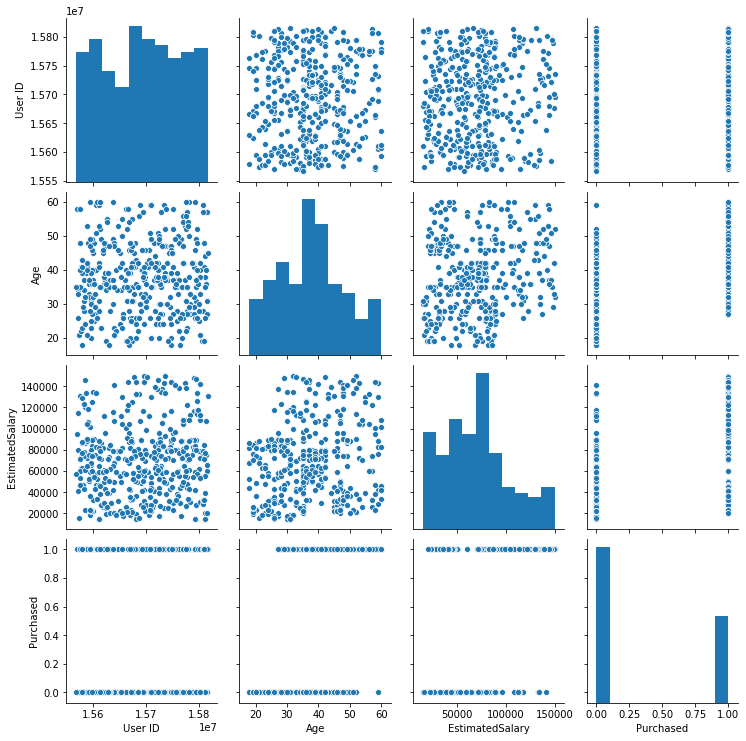

In [18]:
#To create a pair plot of the every numerical values in the dataset
sns.pairplot(ads)
plt.show()

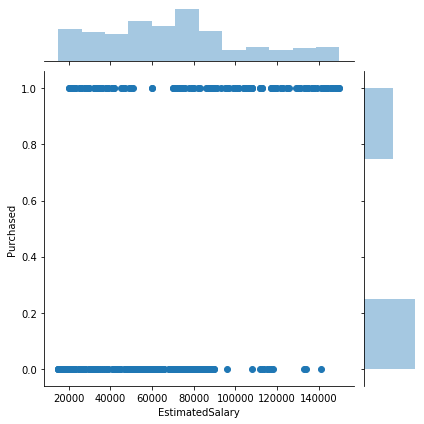

In [19]:
#Creates a scatter plot with the EstimatedSalary and Purchased datas in the dataset
sns.jointplot('EstimatedSalary','Purchased',data=ads)
plt.show()

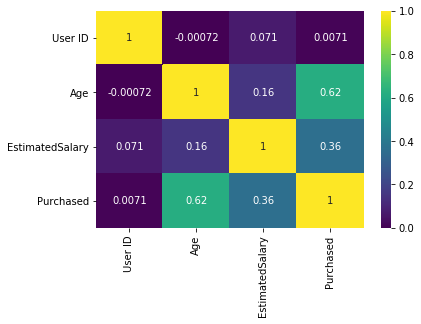

In [20]:
#creates an heatmap of correlation between the dataset.
sns.heatmap(ads.corr(),cmap='viridis',annot=True)
plt.show()

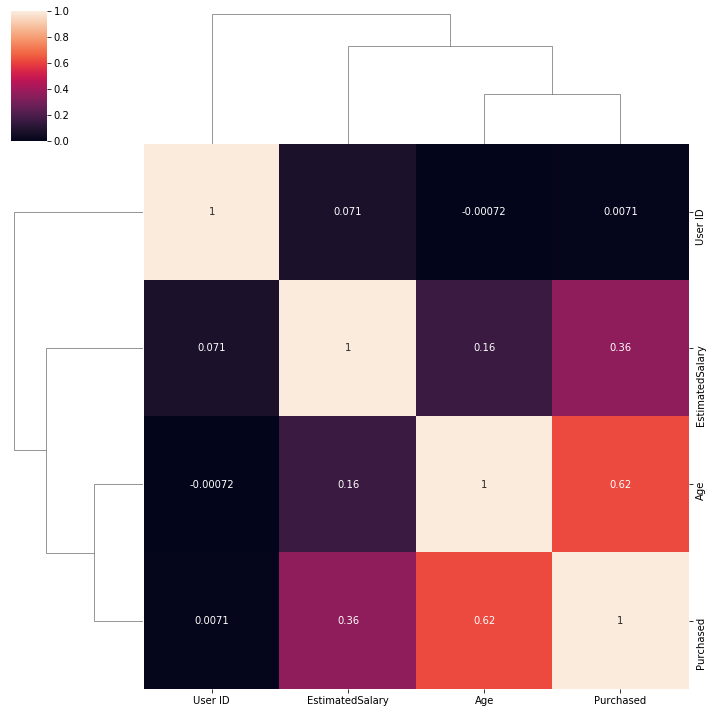

In [21]:
#creates an clustermap of correlation between the dataset.
sns.clustermap(ads.corr(),annot=True)
plt.show()

# Dependent and Independent variable allocation

Inorder to execute simple linear regression algorithm we want to seperate the dependent and independent values in the dataset

where,

X->Independent variable

y->Dependent variable

So in our dataset the 'Purchased' is purely dependent on the 'Age' and 'EstimatedSalary' , so in this case we need to allocate 'Age' and 'EstimatedSalary' for X variable and 'Purchased' for y variable.

In [22]:
X=ads.iloc[:,[2,3]].values # 2 Dimensional array that holds the value of YearsExperience from the dataset.
y=ads.iloc[:,4].values # 2 Dimensional array that holds the value of Salary from the dataset.

# Train and test split

The dependent and independent variables are splitted into training and test data for fitting into our model

In [23]:
#Imports the train test split class from scikit learn (sklearn) library under model_selection package.
from sklearn.model_selection import train_test_split

In [24]:
# Splits the dependent and independent variable into training and test data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0) 

# Feature Scaling

In [25]:
#Importing standardscaler class from scikit learn(sklearn) library under preprocessing package.
from sklearn.preprocessing import StandardScaler

In [26]:
#Creating instance of the standardscaler class.
sc_x=StandardScaler()

In [27]:
X_train=sc_x.fit_transform(X_train) #fit and transforms the training data after featurescaling
X_test=sc_x.transform(X_test) #transform the test data after feature scaling assigns to X_test.

# Importing support vector classifier (SVC) from scikit learn

In [28]:
#Importing SupportVectorClassifier class from scikit learn (sklearn) library from svm package.  
from sklearn.svm import SVC

In [29]:
#instantiate our model (Creating an object for the Support Vector classifier class).
svc_cfier=SVC(kernel='linear',random_state=0)

# Fitting the training data/training our model

In [30]:
#Fitting / training our svc model with our training dataset.
svc_cfier.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [31]:
#assigning the predicted test values of the dataset from the svc_cfier prediction to y_pred 
y_pred=svc_cfier.predict(X_test)

# Finding accuracy of our model

i)using score method

In [32]:
#Prints the accuracy of the Support vector classifier (svc_cfier) model.
print('The Support Vector Classifier (svc_cfier) model has an accuracy of :',svc_cfier.score(X_test,y_test)*100)

The Support Vector Classifier (svc_cfier) model has an accuracy of : 90.0


Using evaluation metrics like classification report and confusion matrix

In [33]:
#Importing classification report and confusion matrix class from scikit learn (sklearn) library under metrics package.
from sklearn.metrics import classification_report,confusion_matrix

ii)Using confusion matrix :

In [34]:
#Prints the confusion matrix of the svc_cfier model results.
print(confusion_matrix(y_test,y_pred))

[[66  2]
 [ 8 24]]


iii)Using classification report :

In [35]:
#Prints the classification report of the svc_cfier model results.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        68
           1       0.92      0.75      0.83        32

    accuracy                           0.90       100
   macro avg       0.91      0.86      0.88       100
weighted avg       0.90      0.90      0.90       100



# Making predictions

In [36]:
age=int(input('Enter the  Age of the employee :')) #Receives age as an input from the user 
estimatedsalary=float(input('Mention your Estimated salary :')) #receives the estimatedsalary as an input from the user.
result=float(svc_cfier.predict([[age,estimatedsalary]]))
print()
print('--Predicted results from Support Vector Classifier (SVC)--')
print()
if result==1:
    print('The employee can buy the SUV')
elif result==0:
    print("The employee can't able to buy the SUV")

Enter the  Age of the employee :25
Mention your Estimated salary :2616562

--Predicted results from Support Vector Classifier (SVC)--

The employee can buy the SUV


Thus we can able to predict whether the employee will buy the SUV or not based upon their age and estimatedsalary with the help of Support vector classifier algorithm.